In [1]:
from sympy import *
from dtumathtools import *
import numpy as np

init_printing()

# Uge 7: Øvelser

## Opgaver -- Store Dag

### 1: Regneregler for stamfunktioner. Håndregning

Find det ubestemte integral $\int \left( 5\cos(x+1)-\sin(5x)+\frac{2}{x-3}-7\right)\mathrm{d}x$ for $x>3$
og gør rede for de regneregler du har brugt undervejs.

![image.png](../images/w7so1.png)

### 2: Riemann-sum for en lineær funktion

Givet funktionen $f:[0,5] \rightarrow \mathbb{R}$ med forskrift $f(x)=2x+3$.

#### Spørgsmål a

Find ved hjælp af Python en værdi for Riemann-summen over intervallet $[0,5]$ med 30 del-intervaller hvor først del-intervallernes venstre interval-endepunkter benyttes, gentag for de højre interval-endepunkter.

In [2]:
# Definer funktionen f(x) = 2x + 3
def f(x):
    return 2*x + 3

# Interval og antal delintervaller
a, b = 0, 5
n = 30

# Bredde af hvert delinterval
dx = (b - a) / n

# Venstre interval-endepunkter
x_left = np.linspace(a, b-dx, n)
riemann_sum_left = np.sum(f(x_left) * dx)

# Højre interval-endepunkter
x_right = np.linspace(a + dx, b, n)
riemann_sum_right = np.sum(f(x_right) * dx)

# Resultater
print("Venstre Riemann-sum: %.2f" % riemann_sum_left)
print("Højre Riemann-sum: %.2f" % riemann_sum_right)

Venstre Riemann-sum: 39.17
Højre Riemann-sum: 40.83


#### Spørgsmål b

Find eksakte værdier for Riemann-summen over intervallet $[0,5]$ med $n$ del-intervaller hvor først del-intervallernes venstre interval-endepunkter benyttes, gentag for de højre interval-endepunkter.

Venstre Riemann-sum:


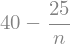

Højre Riemann-sum:


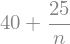

In [3]:
# Definer symboler
x, n = symbols('x n')
i = symbols('i', integer=True)
f = 2*x + 3

# Intervaller
a, b = 0, 5

# Bredden af hvert delinterval
dx = (b - a) / n

# Venstre Riemann-sum
x_i_left = a + i*dx
riemann_sum_left = simplify(Sum(f.subs(x, x_i_left) * dx, (i, 0, n-1)).doit())

# Højre Riemann-sum
x_i_right = a + (i+1)*dx
riemann_sum_right = simplify(Sum(f.subs(x, x_i_right) * dx, (i, 0, n-1)).doit())

# Resultater
print("Venstre Riemann-sum:")
display(riemann_sum_left)
print("Højre Riemann-sum:")
display(riemann_sum_right)

#### Spørgsmål c

Angiv et eksakt udtryk for den maksimale og minimale fejl, begge udtryk skal kun afhænge af $n$. (Hvis Riemannsummen angiver en approksimativ værdi for Riemann integralet).

#### Svar
Vi fandt i del b, følgende udtryk:
$$
40 - \frac{25}{n} \quad \text{og} \quad
40 + \frac{25}{n}
$$

Herfra kan vi nemt aflæse at når $n \to 0$ så er fejlen $0$ og når $n = 1$, så er fejlen $25$.

#### Spørgsmål d

Argumenter, i dette specielle tilfælde, for at Riemann-summen har samme grænseværdi uanset valg af punkt i del-intervallet.

#### Svar
- Hvis en funktion er lineær, vil den gennemsnitlige værdi af funktionen over ethvert lille interval være tæt på dens midtpunktværdi. 
- Når vi øger n, bliver intervallerne mindre, og forskellen mellem venstre, højre og vilkårlige prøvepunkter bliver ubetydelig. 
- Dette betyder, at alle Riemann-summer nærmer sig samme grænseværdi uanset valg af prøvepunkter.

### 3: Brug af Fundamentalsætningen

#### Spørgsmål a

Angiv en stamfunktion til $\frac{1}{1+x^2}$. Bestem derefter integralet $\int_0^1\frac{1}{1+x^2}\mathrm{d}x$.

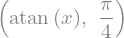

In [4]:
# Svar
x = symbols('x')
f = 1/(1+x**2)

# Stamfunktion
F = integrate(f, x)
F, F.subs(x, 1) - F.subs(x, 0)

#### Spørgsmål b

Bestem dobbeltintegralerne 

\begin{equation*}
\int_1^2\Big (\int_0^1\frac{\mathrm{e}^{2x}}{y}\mathrm{d}x\Big)\mathrm{d}y
\end{equation*}

og 

\begin{equation*}
\int_0^{\frac{\pi}{2}}\Big (\int_0^1y\cos(xy)\mathrm{d}x\Big)\mathrm{d}y
\end{equation*}

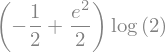

In [5]:
# Svar 1
x, y = symbols('x y')

f = exp(2*x)/y
F1 = integrate(f, (x,0,1))
F2 = integrate(F1, (y,1,2))
F2

In [6]:
# Svar 2
x, y = symbols('x y')

f = y*cos(x*y)
F1 = integrate(f, (x,0,1))
F2 = integrate(F1, (y,0, pi/2))
F2

#### Spørgsmål c

Lad $f: [-5,5] \to \mathbb{R}$ være givet ved 

\begin{equation*}
f(x) =   \begin{cases} 
1 & \text{for } x \in [0,1] \\
0 & \text{for } x \in [-5,5] \setminus [0,1].
\end{cases}
\end{equation*}

Udregn:

\begin{equation*}
      F(x) = \int_{x_{0}}^{x} f(y) \mathrm{d} y   \quad \text{for $x \in [-5,5]$},
  \end{equation*}

hvor $x_{0}\in [-5,5]$ er fast, men vilkårlig. Vælg fx $x_0=0$. Er $F$ kontinuert? Er $F$ differentiabel i alle punkter? Er $F$ en stamfunktion for $f$?

The function is:


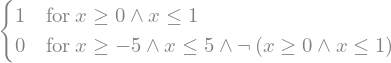

The integral is:


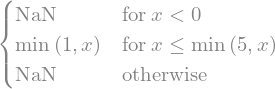

In [7]:
# Svar
x = symbols('x')

# Define the piecewise function correctly
f = Piecewise(
    (1, (x >= 0) & (x <= 1)),
    (0, (x >= -5) & (x <= 5) & ~((x >= 0) & (x <= 1))))

x0 = 0
F = integrate(f, (x, x0, x))

# print the result
print("The function is:")
display(f)
print("The integral is:")
display(F)

**Er den kontinuær**

Ja, da der ikke er nogle hop i funktionen.

**Er den differentiabel**

Ja, men det er den ikke i $0$ og $1$, da vi får to resultater her, hvilket ikke er muligt for en differentiabel funktion.

**Er den en stamfunktion**

Nej, da vi ikke kan differentierer i alle punkter.

### 4: Parametriseringer i planen. Håndregning

Betragt mængderne $U \subset \mathbb{R}^2$ givet ved 

\begin{equation*}
    U = B((0,0),2) \setminus \overline{B((0,0),1)},
\end{equation*}

hvor $B((0,0),r)$ er den åbne cirkelskive (open ball) med radius $r$ og centrum $(0,0)$ og $\overline{B((0,0),r)}$ er den afsluttede/lukkede cirkelskive (hvor randen er med).

Lav en skitse af mængden $U$. Angiv en parametrisering $\pmb{p}: ]1,2[ \times [0,2\pi[ \to U$ af $U$. Vektorfunktionen $\pmb{p}$ skal være en funktion af to variable, i.e. $(r,\theta) \in ]1,2[ \times [0,2\pi[$, og billedmængden af $\pmb{p}$ skal være $U$.

![image.png](../images/w7so4.png)

### 5: Trapez-metoden og Riemann-summer

Det findes mange integraler som det ikke er muligt at udregne eksakt, ofte fordi stamfunktionen ikke kan udtrykkes ved en "kendt" funktion. Vi ønsker i denne opgave at udregne en tilnærmet værdi til:

\begin{equation*}
    \int_0^3 \sin(x^2) \exp(3x) \mathrm{d}x
\end{equation*}

`SciPy`-pakken i Python kan udregne (approksimationer til) integraler ved såkaldt numerisk integration. Vi vil her sammenligne SciPys `quad`-metode med både Riemann-summen som vi kender fra bogen og den såkaldte trapez-metode.

Ved trapez-metoden menes approksimationen til integralet over et lille interval $[x_{j-1},x_j]$ givet ved

\begin{equation*}
    \int_{x_{j-1}}^{x_{j}}f(x)\mathrm{d}x=\frac{1}{2}(x_{j}-x_{j-1})(f(x_{j-1})+f(x_{j}))
\end{equation*}

mens vi ved middelsummer for Riemann integralt med valget $\xi_j := \frac{x_{j}+x_{j-1}}{2}$ har

\begin{equation*} 
    \int_{x_{j-1}}^{x_{j}} f(x)dx\approx f(\xi_j) (x_{j}-x_{j-1}),
\end{equation*}

Hvis man gerne vil approksimere et integral over et større interval $[a,b]$, kan man indele det i flere små intervaller $Q_j=[x_{j-1},x_j]$, $j=1,\dots, J$, og approkismere dem hver for sig, hvorefter man kan lægge dem alle sammen igen - præcis som ved Riemann-summer.

#### Spørgsmål a

Argumenter for at $\sin(x^2) \exp(3x)$ har en stamfunktion og at integralet $\int_0^3 \sin(x^2) \exp(3x) \mathrm{d}x$ er veldefineret. Prøv (i SymPy) at finde den eksakte værdi for 

\begin{equation*}
    \int_0^3 \sin(x^2) \exp(3x) \mathrm{d}x
\end{equation*}

Brug `.evalf()` til at få en tilnærmet værdi af integralet.

In [8]:
# Svar
x = symbols('x')
f = sin(x**2)*exp(3*x)
F = integrate(f, (x,0,3))
F.evalf()

Man kan nok godt få SymPy og Maple til at angive en stamfunktion, men den bliver udtrykt ved en funktion erf som om hverken kan sige at være “kendt” (for os) eller have en “eksplicit” definition, og det giver os derfor ikke mere information end udtrykket.

#### Spørgsmål b

Udregn integralet med `quad` fra `scipy.integrate`. Du skal importere `from scipy.integrate import quad`
og definere:

```{code}
def f(x):
    return sin(x**2)*exp(3*x)
```

In [9]:
from scipy.integrate import quad

def f(x):
    return sin(x**2)*exp(3*x)

quad(f, 0, 3)

#### Spørgsmål c

Vi vil gerne sammenligne det med det Riemann integral, vi har arbejdet med tidligere. Vi bruger Riemann-summer, hvor $[a,b]$ inddeles i $J$ lige store delintervaller. Kan du selv implementere en funktion i Python, som regner det ud for dig? Det skal have formen

```{code}
def riemann_sum(f,a,b,J):
```
hvor $f$ er en kontinuert funktion, $a$ og $b$ er interval-endepunkterne og $J$ antal inddelinger af integralet. Når du har skrevet den kan du teste den på samme integral som ovenfor med $J=20$.

In [ ]:
def riemann(f,a,b,J):
    w = (b - a)/J
    x_v = a
    result = 0
    for i in range(J):
        x_h = x_v + w
        result += f((x_h+x_v)/2)
        x_v = x_h
    result *= w
    return result

# Define the function f(x)
def f_numeric(x):
    return sin(x**2) * exp(3*x)  # Use Python's math functions

# Compute Riemann sums with 20 intervals
J = 20
left_sum = riemann(f_numeric, 0, 3, J)
right_sum = riemann(f_numeric, 0, 3, J)
midpoint_sum = riemann(f_numeric, 0, 3, J)

# Print results
print(f"Riemann ({J} delintervaller): {left_sum:.6f}")

Riemann (20 delintervaller): 1284.013052


#### Spørgsmål d

Ved trapez-metoden approksimerer vi ikke længere arealet under en graf med et rektangel. Kan du komme frem til hvordan formen ser ud baseret på formlen ovenfor?

#### Svar
I stedet for at tilnærme arealet under grafen ved et rektangel (som i Riemann-summen), bruger vi trapezer.

#### Spørgsmål e

Implementer nu trapez-metoden

```{code}
def trapez_sum(f,a,b,J):
```
hvor $f$ er en kontinuert funktion, $a$ og $b$ er interval-endepunkterne og $J$ antal inddelinger af integralet. Når du har skrevet den kan du teste den på samme integral som ovenfor med $J=20$.

In [21]:
# Svar
def trapez_method(f, a, b, J):
    '''
    Beregner integralet af f(x) på intervallet [a,b] med J delintervaller ved hjælp af trapezmetoden.

    Parametre:
    - f: En kontinuerlig funktion f(x), givet som en Python-funktion.
    - a, b: Interval-endepunkterne.
    - J: Antal delintervaller.

    Returnerer:
    - En numerisk approksimation af integralet.
    '''
    dx = (b - a) / J  # Bredden af hvert delinterval
    x_vals = np.linspace(a, b, J+1)  # Inkluderer både x_0 og x_J

    integral = (f(x_vals[0]) + f(x_vals[-1])) / 2  # f(a) + f(b), vægtet med 1/2
    integral += np.sum(f(x_vals[1:-1]))  # Sum af indre funktionværdier
    integral *= dx  # Gang med Δx

    return integral

# Definer den funktion, vi vil integrere
def f_numeric(x):
    return sin(x**2) * exp(3*x)

# Compute the integral with 20 intervals
J = 20
trapez_integral = trapez_method(f_numeric, 0, 3, J)

# Print result
print(f"Trapezmetoden integral ({J} delintervaller): {trapez_integral:.6f}")

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'as_coefficient'

#### Spørgsmål f

Det ser ikke umiddelbart ud til vi får det samme værdi af integralet. Sammenlign dine resultater fra Spørgsmål a, b, c og e. Hvilken metode er bedst? Hvorfor mon? Prøv også både med flere og færre indelinger af intervallet.

### 6: Et uegentligt integral. Håndregning.

#### Spørgsmål a

Følgende er ikke et Riemann integral $\int_0^1 \frac{1}{\sqrt{x}} \mathrm{d} x$. Hvorfor ikke?

#### Spørgsmål b

Udregn $\int_0^1 \frac{1}{\sqrt{x}} \mathrm{d} x$ som $\lim_{a \to 0} \int_a^1 \frac{1}{\sqrt{x}} \mathrm{d} x$

#### Spørgsmål c

Find på lignende måde integralet $\int_1^\infty \frac{1}{\sqrt{x}} \mathrm{d} x$ (hvis muligt).

### 7: Variabelskift for et integral i 2D

Bestem integralet
\begin{equation*}
    \int_{0}^1\int_1^8\frac{y}{x+xy}\mathrm{d} x\mathrm{d}y
\end{equation*}
ved hjælp af variabelskift.

## Opgaver -- Lille Dag

### 1: Ubestemte og bestemte integraler. Håndregning

#### Spørgsmål a

Bestem en stamfunktion til hver af funktionerne 

\begin{equation*}
    x^3, \quad  \frac{1}{x^3} \quad \text{og} \quad \sin(3x-\frac{\pi}{2})
\end{equation*}

#### Spørgsmål b

Udregn de følgende Riemann integraler

\begin{equation*}
    \int_0^{1}x^3\mathrm{d}x, \quad \int_1^{2}\frac{1}{x^3}\mathrm{d}x 
\quad \text{og} \quad
\int_{-\frac{\pi}{2}}^{0}\sin(3x-\frac{\pi}{2})\mathrm{d}x.
\end{equation*}

### 2: Partiel integration. Håndregning

#### Spørgsmål a

Vi skal først *bevise* <a href="../_assets/textbook_mat1b_en.pdf#item:rules-int-partial">formlen</a>
for partiel integration. Start med at differentiere udtrykket på højresiden af

\begin{equation*}
   \int f(x)g(x)\mathrm{d}x = F(x)g(x)- \int F(x)g^\prime(x) \mathrm{d} x.
\end{equation*}



Færdiggør nu beviset.

#### Spørgsmål b

Bestem en stamfuntion til funktionen $x\cos(x)$, og tjek at den er korrekt.

#### Spørgsmål c

Find en stamfunktion til $\ln(x)$ ved hjælp af partiel integration.

### 3: Integration ved substitution. Håndregning

Til spørgsmålene i denne opgave, benyt substitutionsformlen

\begin{equation*}
    \int{f(g(x))g'(x)\mathrm{d}x}=\int{f(t)\mathrm{d}t}\quad \text{hvor } t=g(x)
\end{equation*}

#### Spørgsmål a

Bestem en stamfunktion til $\displaystyle{x\mathrm{e}^{x^2}}$.

#### Spørgsmål b

Find det ubestemte integral $\displaystyle{\int \frac{x}{x^2+1}  \mathrm{d}x}$.

#### Spørgsmål c

Find en stamfunktion til $\displaystyle{\frac{\sin (x)}{3 -\cos(x)}}$ og bestem derefter $\displaystyle{\int_0^{\pi} \frac{\sin (x)}{3 -\cos(x)} \mathrm{d}x}$.

### 4: Talfølger. Håndregning

I denne og den følgende opgave gives der smagsprøver på en vigtig byggesten for integralregning: Talfølger og deres eventuelle konvergens. Fra Den Store Danske (Gyldendal):

>**konvergens**, begreb af fundamental betydning i matematisk analyse, specielt i teorien for uendelige rækker. En følge af reelle tal $x_1,x_2,\ldots$ kaldes konvergent, hvis der findes et tal $x$, så tallet $x_n$ er vilkårligt tæt på $x$, blot $n$ er tilstrækkelig stor $(\ldots)$. Tallet $x$ kaldes grænseværdien for følgen, som siges at konvergere mod $x$ Hvis følgen ikke er konvergent, kaldes den divergent.

Mere præcist siges en talfølge $x_1,x_2,\ldots$ at være konvergent hvis der findes et tal $x$ med følgende egenskab: 

\begin{equation*}
\forall \epsilon >0 \exists N \in \mathbb{N}: n \ge N \Rightarrow |x_n -x| < \epsilon. 
\end{equation*}

Fire talfølger $(a_n)_{n=1}^\infty$, $(b_n)_{n=1}^\infty$, $(c_n)_{n=1}^\infty$ og $(d_n)_{n=1}^\infty$ er givet ved

\begin{equation*}
    a_n=\frac 1n, \: b_n=\frac{n-1}{2n}, \: c_n=\frac{n}{1000} \:\text{og}\; d_n=\frac{4n^2+16}{8-3n^2}
\end{equation*}

for $n \in \mathbb{N}$. En følge skrives kort $(a_n)$ for $(a_1, a_2, \dots)$ og kan opfattes som en uendelig liste (eng: infinite ordered list).

Afgør hvilke af de fire talfølger der er konvergente, og angiv grænseværdien for dem som er konvergente. 

**Note:**
Konvergens begrabet er ikke kun vigtigt i den matematiske analyse. Det er også *den præcise bekskrivelse* af "ingeniør-udsagn" som: 

> Vores algoritme/metode/osv. konvergerer hvis vi blot medtager nok målepunkter/datapunkter/samplinger/osv.

### 5: Integraler via venstresummer. Håndregning

Vi skal udregne Riemann integralet $\displaystyle{\int_0^1 f(x) \mathrm{d}x}$ af funktionen 

\begin{equation*}
    f(x)=x, \quad x\in \left[0,1\right]
\end{equation*}

**direkte** fra definitionen (du må altså ikke finde en stamfunktion $F(x)=x^2/2$ og så udregne $F(1)-F(0)=1/2-0=1/2$).

Vi opdeler intervallet $[0,1]$ i $n$ *lige store* stykker, dvs $x_j=j/n$ for $j=0,1,2,\dots, n$. Riemann summen $S_n$ kaldes for en *ventresum* $V_n$, hvis vi altid evaluerer $f$ i venstre endepunkt i hvert del-interval, altså $\xi_j = x_{j-1}$ for $\xi_j \in [x_{j-1},x_j]$ for $j=1,2,\dots, n$. 

Bestem ved hjælp heraf $\displaystyle{\int_0^1 x\mathrm{d}x} = \lim_{n \to \infty} V_n$.